In [ ]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Outlier detection
import scipy.stats as stats
from sklearn.ensemble import IsolationForest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import dataframe
df_original = pd.read_csv('/content/drive/MyDrive/Eskwelabs_Sprint2/psa_data_2021.csv')
df = df_original.copy() # Made a copy of the data frame so that we dont do anything to the original incase of errors
df.columns

Index(['W_REGN', 'W_PROV', 'SEQUENCE_NO', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'TOINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL',
       'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA',
       'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL',
       'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS',
       'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD',
       'CLOTH', 'FURNISHING', 'HEALTH', 'HOUSING_WATER', 'ACTRENT', 'RENTVAL',
       'IMPUTED_RENT', 'BIMPUTED_RENT', 'TRANSPORT', 'COMMUNICATION',
       'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE',
       'OCCASION', 'OTHER_EXPENDITURE', 'OTHER_DISBU

In [ ]:
# Dictionary to map W_REGN values to REGN_NAME
region_mapping = {
    13: 'National Capital Region',
    14: 'Cordillera Administrative Region',
    1: 'Region I - Ilocos Region',
    2: 'Region II - Cagayan Valley',
    3: 'Region III - Central Luzon',
    4: 'Region IVA - CALABARZON',
    5: 'Region V- Bicol',
    6: 'Region VI - Western Visayas',
    7: 'Region VII - Central Visayas',
    8: 'Region VIII - Eastern Visayas',
    9: 'Region IX - Zamboanga Peninsula',
    10: 'Region X - Northern Mindanao',
    11: 'Region XI - Davao',
    12: 'Region XII - SOCCSKSARGEN',
    16: 'Region XIII - Caraga',
    15: 'Autonomous Region in Muslim Mindanao',
    17: 'Region IVB - MIMAROPA'
}

#df['REGN_NAME'] = df['W_REGN'].replace(region_mapping)

In [ ]:
df['monthlyinc']=df['TOINC']/12

In [ ]:
df['income_status'] = df['monthlyinc'].apply(lambda x: '1' if x < 12030 else '0').astype(int) #1 is poor, 0 is not poor

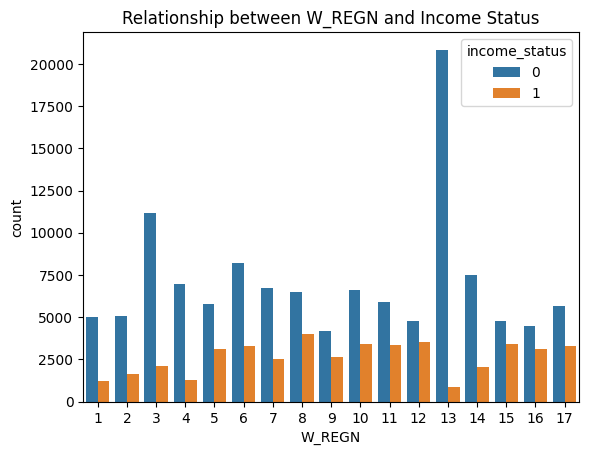

In [ ]:
sns.countplot(data=df, x='W_REGN', hue='income_status')
plt.title('Relationship between W_REGN and Income Status')
plt.xticks(rotation=0)
plt.show()

# Abdul's EDA

In [ ]:
province_income_df = df.groupby(['W_PROV','income_status']).agg({
    'income_status': 'count'
}).rename(columns={
    'income_status': 'income_status_count'
}).reset_index()

province_income_df = province_income_df.sort_values(by='income_status_count', ascending=False)

In [ ]:
custom_palette = ['green' if i < 3 else 'gray' for i in range(len(province_income_df))]

sns.barplot(data=province_income_df[province_income_df.income_status == '0'].head(10),
            y='income_status_count',
            x='W_PROV',
            order=province_income_df[province_income_df.income_status == '0']['W_PROV'].head(10),
            palette=custom_palette)
plt.xlabel('Province')
plt.ylabel('Income Status')
plt.title('Provinces with most non-poor households')
plt.show()

sns.barplot(data=province_income_df[province_income_df.income_status == '1'].head(10),
            y='income_status_count',
            x='W_PROV',
            order=province_income_df[province_income_df.income_status == '1']['W_PROV'].head(10),
            palette=custom_palette)
plt.xlabel('Province')
plt.ylabel('Income Status')
plt.title('Provinces with most poor households')
plt.show()

ValueError: ignored

# Bernard's EDA


In [ ]:
df.shape

# There is a total of 165,029 data points, with 88 variables
# We will have to reduce dimensionality, probably by picking pertinent features only

(165029, 90)

In [ ]:
df.info()

# All features appear to be cleaned already, so not a consideration for feautres selection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165029 entries, 0 to 165028
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        165029 non-null  int64  
 1   W_PROV                        165029 non-null  int64  
 2   SEQUENCE_NO                   165029 non-null  int64  
 3   FSIZE                         165029 non-null  float64
 4   REG_SAL                       165029 non-null  int64  
 5   SEASON_SAL                    165029 non-null  int64  
 6   WAGES                         165029 non-null  int64  
 7   NETSHARE                      165029 non-null  int64  
 8   CASH_ABROAD                   165029 non-null  int64  
 9   CASH_DOMESTIC                 165029 non-null  int64  
 10  RENTALS_REC                   165029 non-null  int64  
 11  INTEREST                      165029 non-null  int64  
 12  PENSION                       165029 non-nul

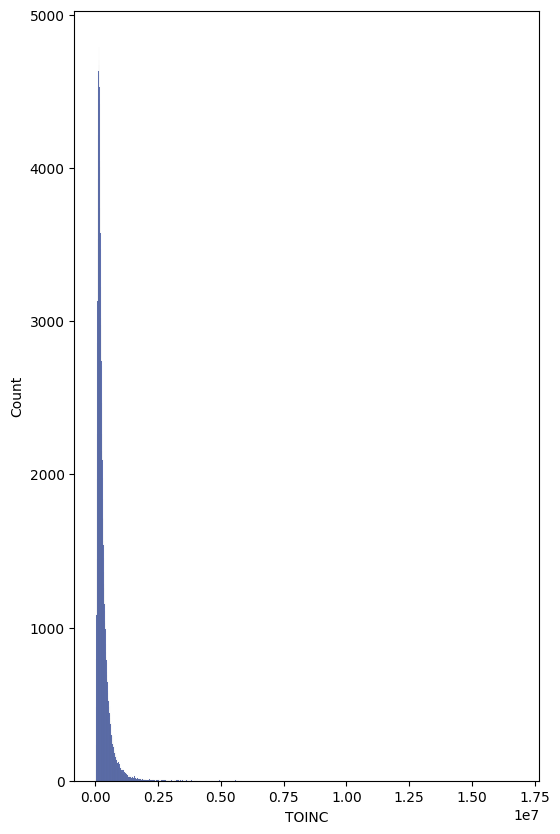

In [ ]:
plt.figure(figsize=(6, 10))
sns.histplot(data=df, x='TOINC', color="#2f469c")
plt.show()

# Total income is highly skewed, as expected
# Let's zoom in the IQR to see the distribution of the bulk of the dataset

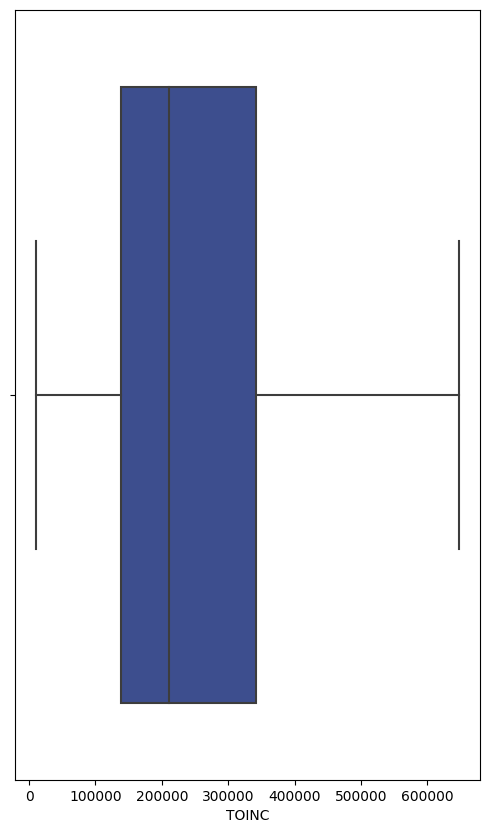

Median Total Income: 210200.0
Median Monthly Total Income: 17516.666666666668


In [ ]:
plt.figure(figsize=(6, 10))
sns.boxplot(data=df, x='TOINC', color="#2f469c", sym='')
plt.show()

# Assuming that this is yearly HH income
print('Median Total Income:', df['TOINC'].median())
print('Median Monthly Total Income:', df['TOINC'].median()/12)

# The median data point is considered 'low-income but not poor'.
# (income brackets: https://news.abs-cbn.com/news/09/17/20/who-are-identified-rich-poor-govt-shows-income-class-brackets-in-ph)
# Since we have agreed that 'Total Household Income' is going to be the target feature, we have to make sure now that there is a 70-30(maximum) relationship between the majority and minority groups.

In [ ]:
n_poor = df[df['TOINC'] < 10957*12].shape[0]
n_low = df[(df['TOINC'] >= 10957*12) & (df['TOINC'] < 21914*12)].shape[0]
n_lower_middle = df[(df['TOINC'] >= 21914*12) & (df['TOINC'] < 43828*12)].shape[0]
n_middle = df[(df['TOINC'] >= 43828*12) & (df['TOINC'] < 7666*12)].shape[0]
n_upper_middle = df[(df['TOINC'] >= 76669*12) & (df['TOINC'] < 131484*12)].shape[0]
n_upper = df[(df['TOINC'] >= 131484*12) & (df['TOINC'] < 219140*12)].shape[0]
n_rich = df[df['TOINC'] >= 219140*12].shape[0]

n_psa_poor = df[df['TOINC'] < 12030*12].shape[0]
n_psa__not_poor = df[df['TOINC'] >= 12030*12].shape[0]

print('from psa', n_psa_poor/df.shape[0]*100)

# If we use the PSA Poverty Threshold monthly income for 2021, our categorically 'poor' data points comprise 27%. We will use the PSA Threshold.

from psa 27.22067030643099


In [ ]:
df.groupby('income_status').agg('median', '')[['TOINC', 'TOTEX']]

,TOINC,TOTEX
income_status,,
0,267540.0,209418.0
1,108070.0,89878.5


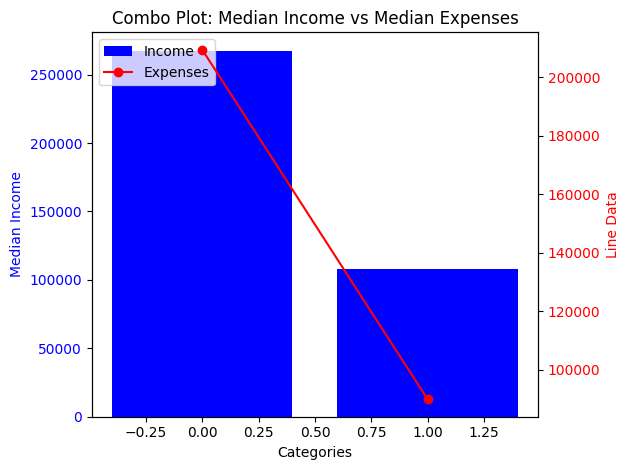

In [ ]:
aggregated_df = df.groupby('income_status').agg({'TOINC':'median', 'TOTEX':'median'}).reset_index()
aggregated_df.columns

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Create bar chart on the primary y-axis (left)
ax1.bar(aggregated_df['income_status'], aggregated_df['TOINC'], color='b', label='Income')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Median Income', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis (right) for the line chart
ax2 = ax1.twinx()
ax2.plot(aggregated_df['income_status'], aggregated_df['TOTEX'], color='r', marker='o', linestyle='-', label='Expenses')
ax2.set_ylabel('Line Data', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Set title
plt.title('Combo Plot: Median Income vs Median Expenses')

# Show the plot
plt.tight_layout()
plt.show()

# Ely's EDA

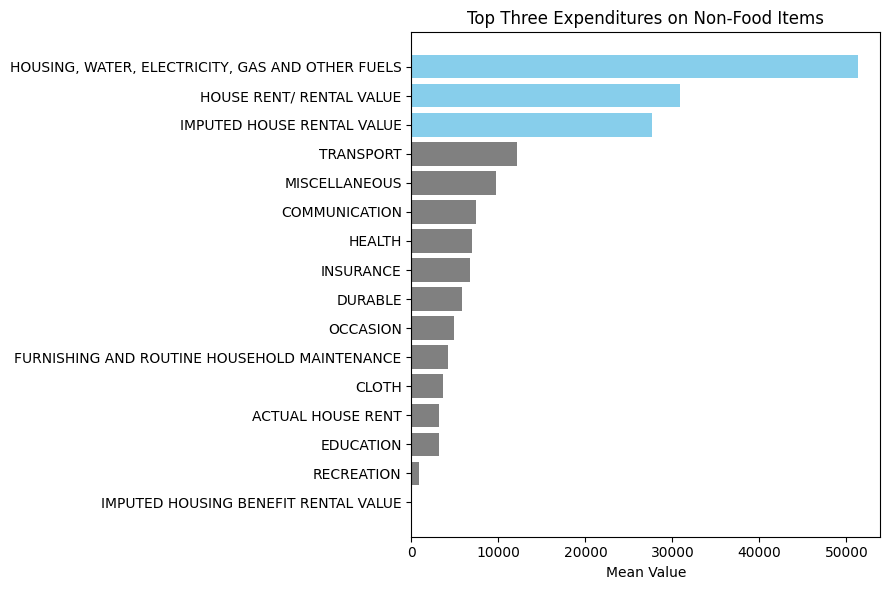

In [ ]:
# Getting the Top 3 Expenditures on Non-Food Items
# Calculate the mean of each column
mean_CLOTH = df['CLOTH'].mean()
mean_FURNISHING = df['FURNISHING'].mean()
mean_HEALTH = df['HEALTH'].mean()
mean_HOUSING_WATER = df['HOUSING_WATER'].mean()
mean_ACTRENT = df['ACTRENT'].mean()
mean_RENTVAL = df['RENTVAL'].mean()
mean_IMPUTED_RENT = df['IMPUTED_RENT'].mean()
mean_BIMPUTED_RENT = df['BIMPUTED_RENT'].mean()
mean_TRANSPORT = df['TRANSPORT'].mean()
mean_COMMUNICATION = df['COMMUNICATION'].mean()
mean_RECREATION = df['RECREATION'].mean()
mean_EDUCATION = df['EDUCATION'].mean()
mean_INSURANCE = df['INSURANCE'].mean()
mean_MISCELLANEOUS = df['MISCELLANEOUS'].mean()
mean_DURABLE = df['DURABLE'].mean()
mean_OCCASION = df['OCCASION'].mean()

# Create a horizontal bar graph
plt.figure(figsize=(9, 6))

# Combine the means and labels into lists
means = [mean_CLOTH, mean_FURNISHING, mean_HEALTH, mean_HOUSING_WATER, mean_ACTRENT, mean_RENTVAL, mean_IMPUTED_RENT, mean_BIMPUTED_RENT, mean_TRANSPORT, mean_COMMUNICATION, mean_RECREATION, mean_EDUCATION, mean_INSURANCE, mean_MISCELLANEOUS, mean_DURABLE, mean_OCCASION]
labels = ['CLOTH', 'FURNISHING AND ROUTINE HOUSEHOLD MAINTENANCE','HEALTH','HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS','ACTUAL HOUSE RENT','HOUSE RENT/ RENTAL VALUE','IMPUTED HOUSE RENTAL VALUE','IMPUTED HOUSING BENEFIT RENTAL VALUE','TRANSPORT','COMMUNICATION','RECREATION','EDUCATION','INSURANCE','MISCELLANEOUS','DURABLE','OCCASION']

# Sort the means and labels from lowest to highest
sorted_means, sorted_labels = zip(*sorted(zip(means, labels), reverse=False))

# Create a color map for the bars
# colors = ['lightblue', 'lightcoral']

# Create the horizontal bar graph
colors = ['skyblue' if idx > 12 else 'gray' for idx in range(len(means))]
plt.barh(sorted_labels, sorted_means, color=colors)
plt.xlabel('Mean Value')
plt.title('Top Three Expenditures on Non-Food Items')

# Show the plot
plt.tight_layout()
plt.show()

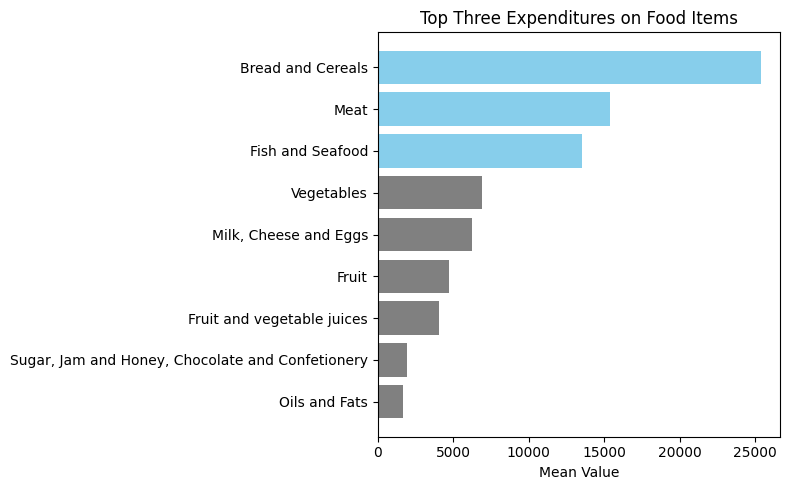

In [ ]:
# Getting the Top 3 Expenditures on Food Items
# Calculate the mean of each column
mean_BREAD = df['BREAD'].mean()
mean_MEAT = df['MEAT'].mean()
mean_FISH = df['FISH'].mean()
mean_MILK = df['MILK'].mean()
mean_OIL = df['OIL'].mean()
mean_FRUIT = df['FRUIT'].mean()
mean_VEG = df['VEG'].mean()
mean_SUGAR = df['SUGAR'].mean()
mean_FOOD_NEC = df['FOOD_NEC'].mean()
mean_FRUIT_VEG = df['FRUIT_VEG'].mean()

# Create a horizontal bar graph
plt.figure(figsize=(8, 5))

# Combine the means and labels into lists
means = [mean_BREAD, mean_MEAT, mean_FISH, mean_MILK, mean_OIL, mean_FRUIT, mean_VEG, mean_SUGAR, mean_FOOD_NEC, mean_FRUIT_VEG]
labels = ['Bread and Cereals', 'Meat','Fish and Seafood','Milk, Cheese and Eggs','Oils and Fats','Fruit','Vegetables','Sugar, Jam and Honey, Chocolate and Confetionery','Fruit and vegetable juices']

# Sort the means and labels from lowest to highest
sorted_means, sorted_labels = zip(*sorted(zip(means, labels), reverse=False))

# Create a color map for the bars
# colors = ['lightblue', 'lightcoral']

# Create the horizontal bar graph
colors = ['skyblue' if idx > 5 else 'gray' for idx in range(len(means))]
plt.barh(sorted_labels, sorted_means, color=colors)
plt.xlabel('Mean Value')
plt.title('Top Three Expenditures on Food Items')

# Show the plot
plt.tight_layout()
plt.show()

# Enzo's EDA

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

#import datafraame
df_psa = pd.read_csv('/content/drive/MyDrive/Eskwelabs_Sprint2/psa_data_2021.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Family Expenditures and Incomes (2021)")
print(df_psa)

Family Expenditures and Incomes (2021)
        W_REGN  W_PROV  SEQUENCE_NO  FSIZE  REG_SAL  SEASON_SAL   WAGES  \
0            1      28            1    6.5   290000           0  290000   
1            1      28            2    4.0    80000       72000  152000   
2            1      28            3    1.0        0           0       0   
3            1      28            4    3.0        0           0       0   
4            1      28            5    4.0    12000       80400   92400   
...        ...     ...          ...    ...      ...         ...     ...   
165024      17      59       165025    1.0        0           0       0   
165025      17      59       165026    5.0        0           0       0   
165026      17      59       165027    3.0    55050       54900  109950   
165027      17      59       165028    8.0        0        3600    3600   
165028      17      59       165029    4.0        0       69900   69900   

        NETSHARE  CASH_ABROAD  CASH_DOMESTIC  ...  URB  RPRO

In [ ]:
#check for any missing data
print(df_psa.isna())

        W_REGN  W_PROV  SEQUENCE_NO  FSIZE  REG_SAL  SEASON_SAL  WAGES  \
0        False   False        False  False    False       False  False   
1        False   False        False  False    False       False  False   
2        False   False        False  False    False       False  False   
3        False   False        False  False    False       False  False   
4        False   False        False  False    False       False  False   
...        ...     ...          ...    ...      ...         ...    ...   
165024   False   False        False  False    False       False  False   
165025   False   False        False  False    False       False  False   
165026   False   False        False  False    False       False  False   
165027   False   False        False  False    False       False  False   
165028   False   False        False  False    False       False  False   

        NETSHARE  CASH_ABROAD  CASH_DOMESTIC  ...    URB  RPROV   RPSU  \
0          False        False        

In [ ]:
# Calculate the mean 'TOTDIS' for each category or region
mean_expenses_per_region = df_mycopy.groupby('W_REGN')['TOTDIS'].mean().reset_index()

# Map region codes to region names
mean_expenses_per_region['W_REGN'] = mean_expenses_per_region['W_REGN'].map(region_mapping)

# Sort the DataFrame by median 'TOTDIS' in descending order (optional)
mean_expenses_per_region = mean_expenses_per_region.sort_values(by='TOTDIS', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='W_REGN', y='TOTDIS', data=mean_expenses_per_region)
plt.title('Bar Graph of Mean Total Expenses per Region')
plt.xlabel('Region')
plt.ylabel('Median Expenses')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate the mean 'TOREC' for each category or region
mean_income_per_region = df_mycopy.groupby('W_REGN')['TOREC'].mean().reset_index()

# Map region codes to region names
mean_income_per_region['W_REGN'] = mean_income_per_region['W_REGN'].map(region_mapping)

# Sort the DataFrame by median 'TOREC' in descending order (optional)
mean_income_per_region = mean_income_per_region.sort_values(by='TOREC', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='W_REGN', y='TOREC', data=mean_income_per_region)
plt.title('Bar Graph of Mean Total Income per Region')
plt.xlabel('Region')
plt.ylabel('Median Income')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate the median 'TOTDIS' for each category or region
median_expenses_per_region = df_mycopy.groupby('W_REGN')['TOTDIS'].median().reset_index()

# Map region codes to region names
median_expenses_per_region['W_REGN'] = median_expenses_per_region['W_REGN'].map(region_mapping)

# Sort the DataFrame by median 'TOTDIS' in descending order (optional)
median_expenses_per_region = median_expenses_per_region.sort_values(by='TOTDIS', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='W_REGN', y='TOTDIS', data=median_expenses_per_region)
plt.title('Bar Graph of Median Total Expenses per Region')
plt.xlabel('Region')
plt.ylabel('Median Expenses')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate the median 'TOREC' for each category or region
median_income_per_region = df_mycopy.groupby('W_REGN')['TOREC'].median().reset_index()

# Map region codes to region names
median_income_per_region['W_REGN'] = median_income_per_region['W_REGN'].map(region_mapping)

# Sort the DataFrame by median 'TOREC' in descending order (optional)
median_income_per_region = median_income_per_region.sort_values(by='TOREC', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='W_REGN', y='TOREC', data=median_income_per_region)
plt.title('Bar Graph of Median Total Income per Region')
plt.xlabel('Region')
plt.ylabel('Median Income')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate the median 'TOTDIS' for each category or region
median_expenses_per_region = df_mycopy.groupby('W_REGN')['TOTDIS'].median().reset_index()

# Calculate the median 'TOREC' for each category or region
median_income_per_region = df_mycopy.groupby('W_REGN')['TOREC'].median().reset_index()

# Map region codes to region names for both expenses and income
median_expenses_per_region['W_REGN'] = median_expenses_per_region['W_REGN'].map(region_mapping)
median_income_per_region['W_REGN'] = median_income_per_region['W_REGN'].map(region_mapping)

# Merge the expenses and income DataFrames based on the region
cashflow_per_region = pd.merge(median_expenses_per_region, median_income_per_region, on='W_REGN', suffixes=('_expenses', '_income'))

# Calculate the cashflow as the difference between median income and median expenses
cashflow_per_region['Cashflow'] = cashflow_per_region['TOREC'] - cashflow_per_region['TOTDIS']

# Sort the DataFrame by cashflow in descending order (optional)
cashflow_per_region = cashflow_per_region.sort_values(by='Cashflow', ascending=False)

# Create a bar graph to visualize cashflow
plt.figure(figsize=(20, 10))
sns.barplot(x='W_REGN', y='Cashflow', data=cashflow_per_region)
plt.title('Bar Graph of Cashflow per Region')
plt.xlabel('Region')
plt.ylabel('Cashflow (Income - Expenses)')
plt.xticks(rotation=90)
plt.show()

# Sandy's EDA


In [ ]:
#df = pd.read_csv("FIES PUF 2021 Vol.1.csv")

In [ ]:
# Count of region
df["W_REGN"].value_counts()

13    21689
3     13285
6     11487
8     10498
10     9989
14     9546
11     9222
7      9211
17     8992
5      8913
12     8298
4      8275
15     8212
16     7618
9      6809
2      6737
1      6248
Name: W_REGN, dtype: int64

In [ ]:
#Count of Urban- vs. Rural-based Households
df['URB'].value_counts()

2    85827
1    79202
Name: URB, dtype: int64

In [ ]:
#Income per person
df['IncomePerPerson'] = df['TOINC'] / df['FSIZE']
print(df)

        W_REGN  W_PROV  SEQUENCE_NO  FSIZE  REG_SAL  SEASON_SAL   WAGES  \
0            1      28            1    6.5   290000           0  290000   
1            1      28            2    4.0    80000       72000  152000   
2            1      28            3    1.0        0           0       0   
3            1      28            4    3.0        0           0       0   
4            1      28            5    4.0    12000       80400   92400   
...        ...     ...          ...    ...      ...         ...     ...   
165024      17      59       165025    1.0        0           0       0   
165025      17      59       165026    5.0        0           0       0   
165026      17      59       165027    3.0    55050       54900  109950   
165027      17      59       165028    8.0        0        3600    3600   
165028      17      59       165029    4.0        0       69900   69900   

        NETSHARE  CASH_ABROAD  CASH_DOMESTIC  ...  BWEIGHT     RFACT  \
0              0           

In [ ]:
# Income Category
# Based on the Philippine Institute of Development Studies (https://pidswebs.pids.gov.ph/CDN/PUBLICATIONS/pidspn1818.pdf)
income = df["TOINC"]
print(income)
def categorize_income(income):
    if income < (10957 * 12):
        return 'Poor'
    elif income < (21914 * 12):
        return 'Low'
    elif income < (43828 * 12):
        return 'Lower Middle'
    elif income < (76669 * 12):
        return 'Middle'
    elif income < (131484 * 12):
        return 'Upper Middle'
    elif income < (219140 * 12):
        return 'Upper'
    else:
        return 'Rich'

df['Income Bracket'] = df['TOINC'].map(categorize_income)

0         699940
1         324810
2         190061
3         213705
4         272290
           ...  
165024     46524
165025    123280
165026    143960
165027    131950
165028    137185
Name: TOINC, Length: 165029, dtype: int64


Poor            36663
Lower Middle    42225
Middle          13867
Upper Middle     4205
Upper             939
Rich              327
Name: Income Bracket, dtype: int64

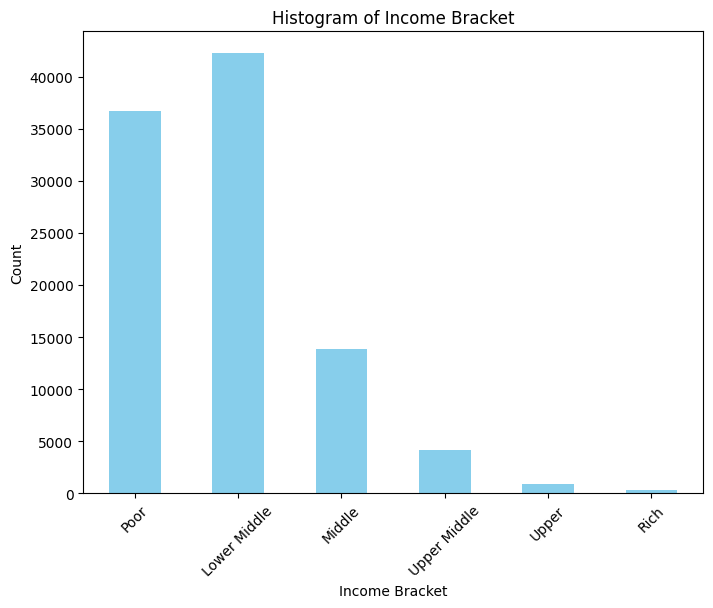

In [ ]:
#Income Bracket Count
custom_order = ['Poor', 'Lower Middle', 'Middle', 'Upper Middle', 'Upper', 'Rich']
income_bracket_count = df['Income Bracket'].value_counts()
income_bracket_count = income_bracket_count.loc[custom_order]
display(income_bracket_count)

plt.figure (figsize=(8,6))
income_bracket_count.plot (kind = 'bar', color = 'skyblue')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.title('Histogram of Income Bracket')
plt.xticks(rotation = 45)
plt.show()

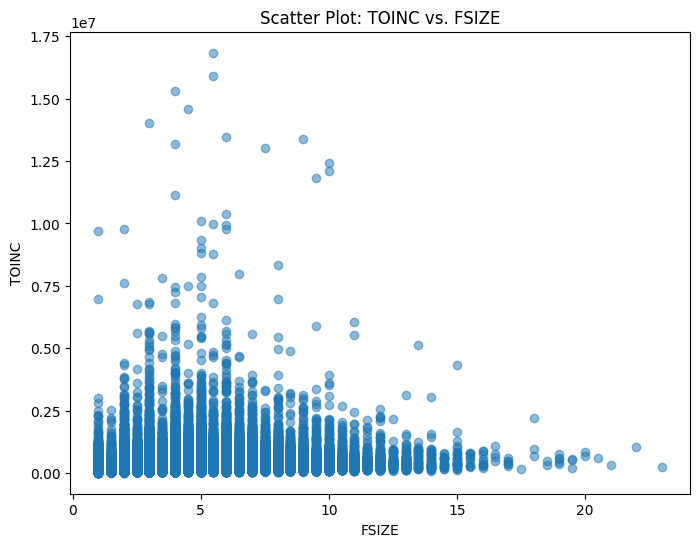

In [ ]:
#Income distribution to family members
plt.figure(figsize=(8, 6))
plt.scatter(df['FSIZE'], df['TOINC'], alpha=0.5)
plt.title('Scatter Plot: TOINC vs. FSIZE')
plt.xlabel('FSIZE')
plt.ylabel('TOINC')
plt.show()

In [ ]:
#Correlation Plot
correlation_matrix = df.corr()
print(correlation_matrix)

                   W_REGN    W_PROV  SEQUENCE_NO     FSIZE   REG_SAL  \
W_REGN           1.000000  0.185227     0.996036  0.022222 -0.001118   
W_PROV           0.185227  1.000000     0.207632 -0.004098  0.049896   
SEQUENCE_NO      0.996036  0.207632     1.000000  0.023886 -0.003075   
FSIZE            0.022222 -0.004098     0.023886  1.000000  0.157118   
REG_SAL         -0.001118  0.049896    -0.003075  0.157118  1.000000   
...                   ...       ...          ...       ...       ...   
RPCINC          -0.034296 -0.052925    -0.036925 -0.413636  0.375924   
PPCINC          -0.000645  0.001074    -0.000714 -0.432112  0.355567   
monthlyinc      -0.027316  0.008524    -0.027315  0.165251  0.658034   
income_status    0.055369 -0.034265     0.053815 -0.254531 -0.311814   
IncomePerPerson -0.023800  0.014672    -0.024433 -0.250669  0.464880   

                 SEASON_SAL     WAGES  NETSHARE  CASH_ABROAD  CASH_DOMESTIC  \
W_REGN            -0.035627 -0.009339  0.010745    -0.08

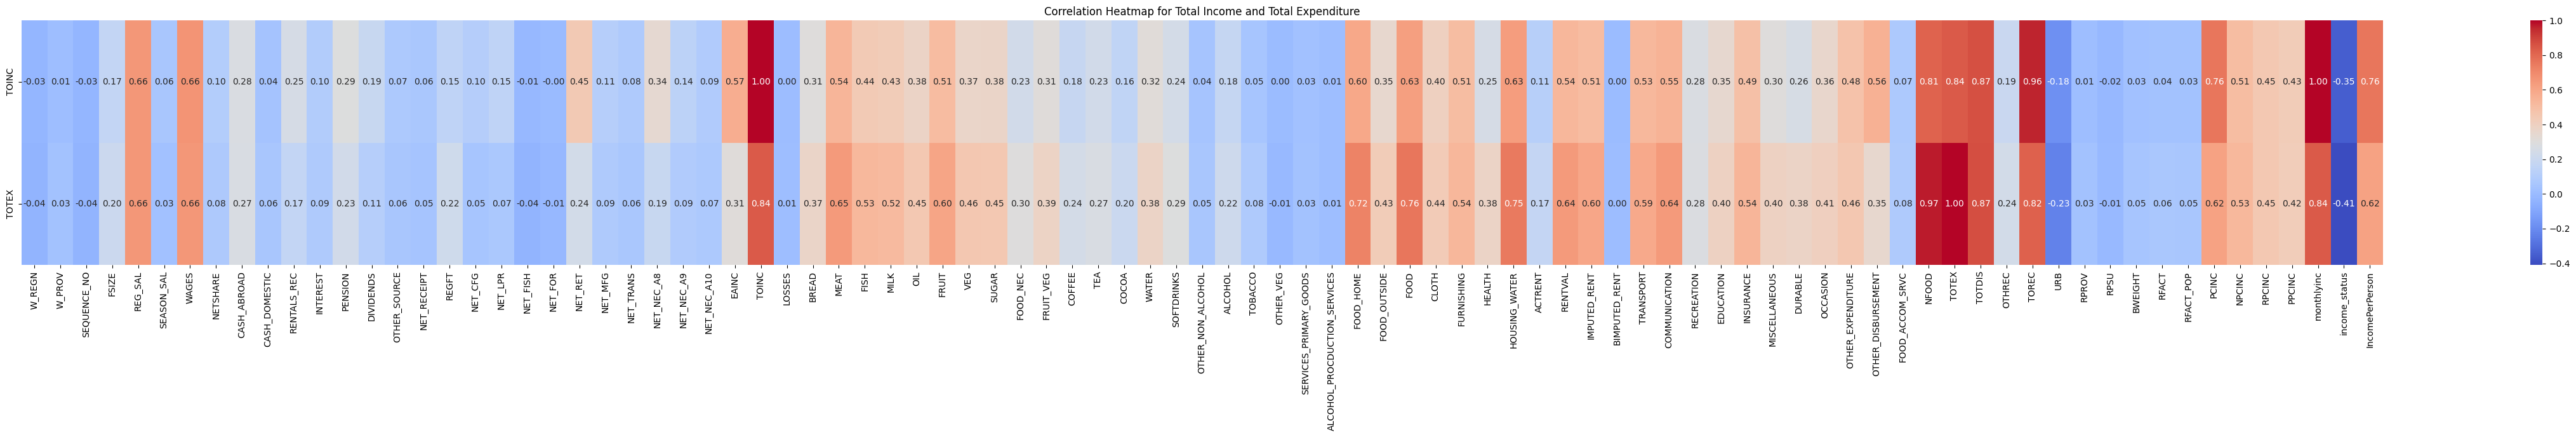

In [ ]:
#Heatmap
column1 = 'TOINC'
column2 = 'TOTEX'

subset_correlation = correlation_matrix.loc[[column1, column2], :]

plt.figure(figsize=(60, 5))
sns.heatmap(subset_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Total Income and Total Expenditure')
plt.show()

<Axes: >

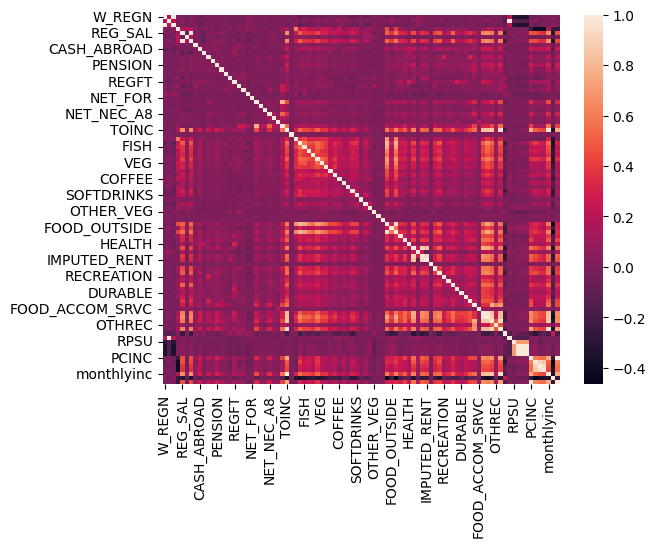

In [ ]:
sns.heatmap(df.corr())

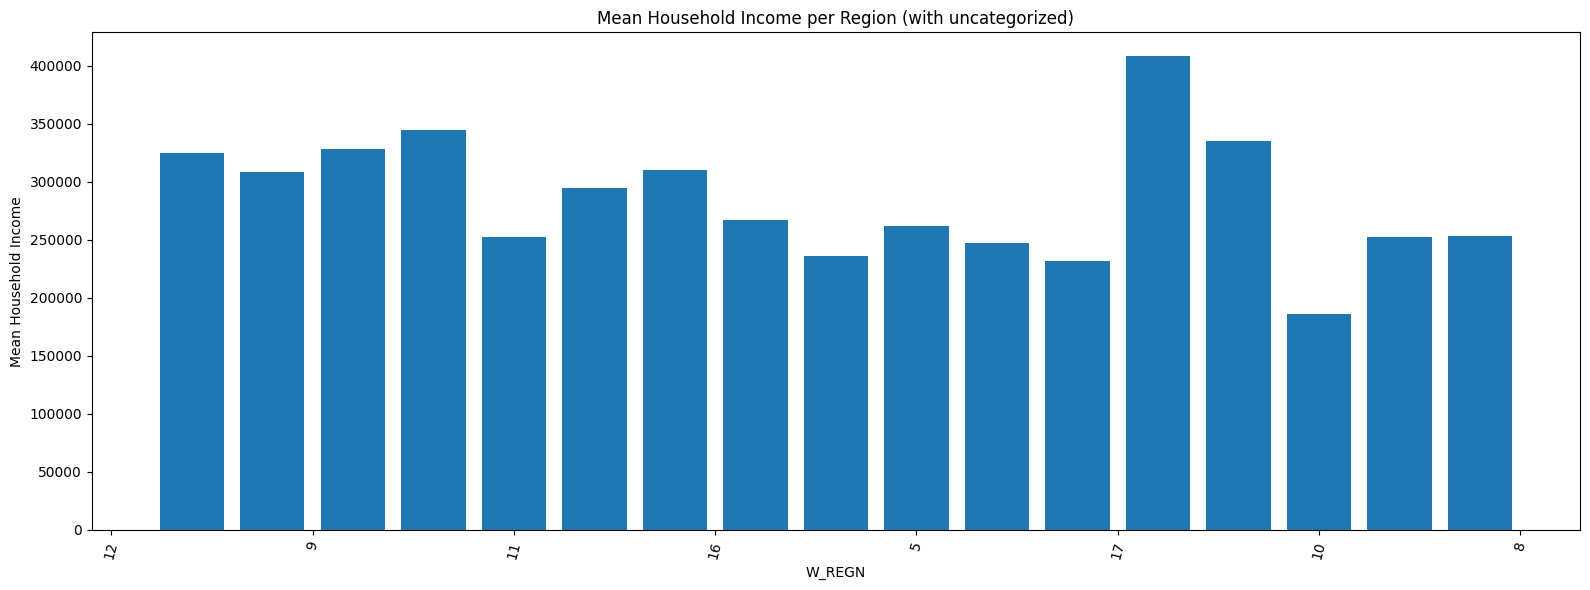

In [ ]:
#Regional Comparisons
aggregated_df = df.groupby('W_REGN').agg({'TOINC': 'mean'}).reset_index(names='W_REGN').sort_values('TOINC')

fig, ax = plt.subplots (figsize = (16, 6))
ax.bar(aggregated_df['W_REGN'], aggregated_df['TOINC'])
ax.set_xlabel('W_REGN')
ax.set_ylabel('Mean Household Income')
ax.set_title('Mean Household Income per Region (with uncategorized)')
ax.set_xticklabels(labels=aggregated_df['W_REGN'], rotation=75)
plt.tight_layout()
plt.show()

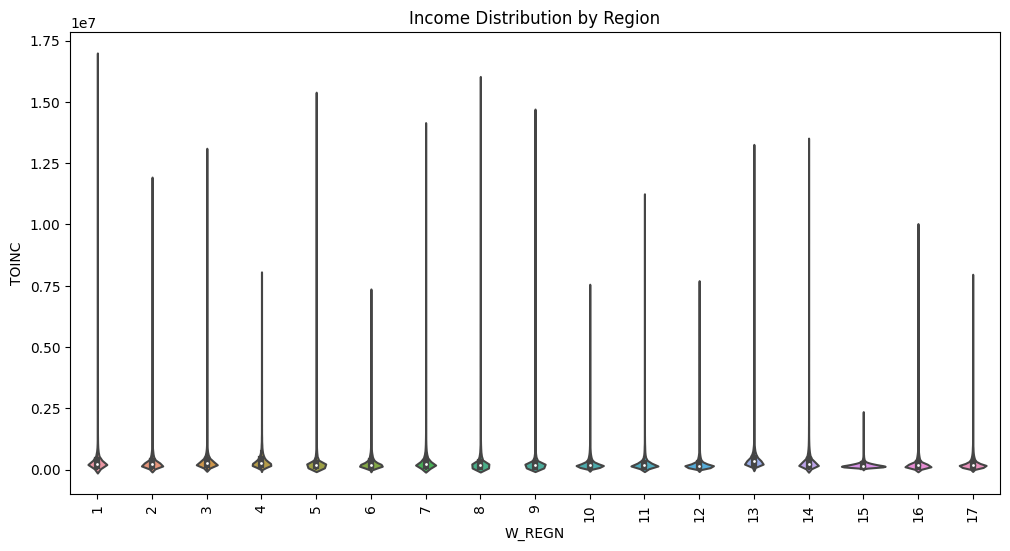

In [ ]:
# Violin plot of income by region
plt.figure(figsize=(12, 6))
sns.violinplot(x='W_REGN', y='TOINC', data=df)
plt.xticks(rotation=90)
plt.title('Income Distribution by Region')
plt.xlabel('W_REGN')
plt.ylabel('TOINC')
plt.show()

In [ ]:
#Urban vs. Rural statistical significance
#Urban = 1.0; Rural = 2.0

from scipy.stats import chi2_contingency


# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['URB'], df['Income Bracket'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')

# Determine the significance level (e.g., 0.05)
alpha = 0.05

# Check for statistical significance
if p < alpha:
    print("There is a significant association between 'URB' and 'Income Brackets'.")
else:
    print("There is no significant association between 'URB' and 'Income Brackets'.")

Chi-squared statistic: 14474.264509874369
p-value: 0.0
There is a significant association between 'URB' and 'Income Brackets'.


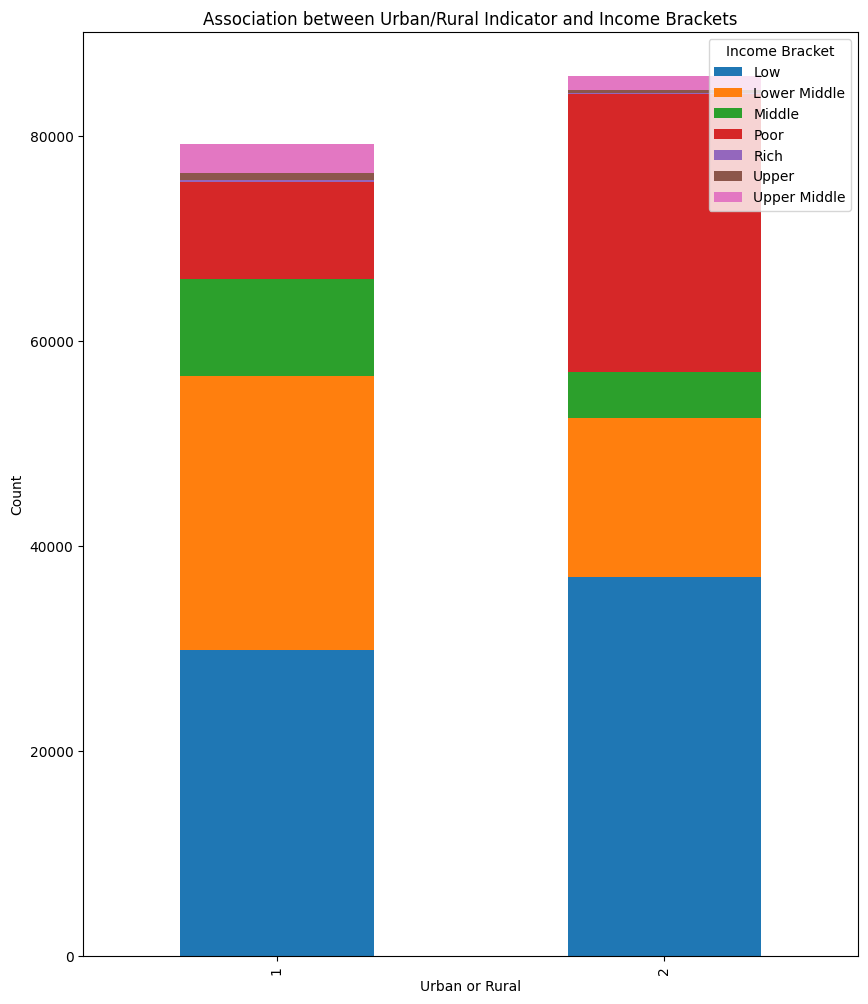

In [ ]:
#Urban vs. Rural comparison Stacked Bar Chart

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 12))
plt.title('Association between Urban/Rural Indicator and Income Brackets')
plt.xlabel('Urban or Rural')
plt.ylabel('Count')
plt.legend(title='Income Bracket', loc='upper right')
plt.show()

In [ ]:
#Total expenditure comparison by income bracket
plt.figure(figsize=(10, 4))
sns.barplot(data=df_clean, x='Income Bracket', y='TOTEX', order = df_clean['Income Bracket'].unique())
plt.xlabel('Income Bracket')
plt.ylabel('TOTEX')
plt.title('Total Expenditure Comparison by Income Bracket')
plt.show()

NameError: ignored

<Figure size 1000x400 with 0 Axes>

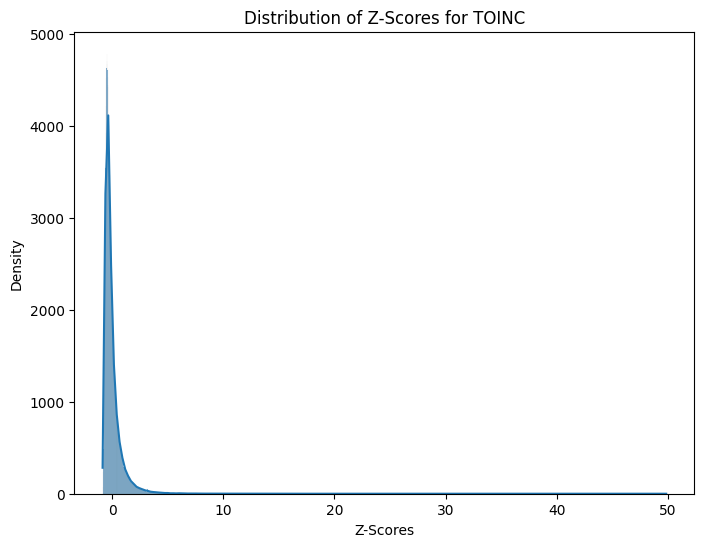

In [ ]:
# Calculate z-scores for 'Total Income'
z_scores_income = (df['TOINC'] - df['TOINC'].mean()) / df['TOINC'].std()

# Create a distribution plot for z-scores of income
plt.figure(figsize=(8, 6))
sns.histplot(z_scores_income, kde=True)
plt.title('Distribution of Z-Scores for TOINC')
plt.xlabel('Z-Scores')
plt.ylabel('Density')
plt.show()